In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('Avocado.csv', index_col='Unnamed: 0')
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df = data[(data['region']=='Orlando') & (data['type']=='conventional')]
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.99,305773.54,211102.90,20765.29,124.04,73781.31,40641.55,33139.76,0.00,conventional,2015,Orlando
1,2015-12-20,1.21,200074.81,131152.60,15794.56,122.07,53005.58,36258.03,16747.55,0.00,conventional,2015,Orlando
2,2015-12-13,0.96,310101.52,217679.37,24260.86,168.63,67992.66,31407.15,36585.51,0.00,conventional,2015,Orlando
3,2015-12-06,1.20,199063.82,135222.96,21555.66,121.93,42163.27,24098.62,18064.65,0.00,conventional,2015,Orlando
4,2015-11-29,0.96,262683.80,190361.54,21007.77,37.82,51276.67,21536.82,29739.85,0.00,conventional,2015,Orlando
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,0.99,759532.37,511953.91,60712.96,1345.00,185520.50,88148.10,97195.73,176.67,conventional,2018,Orlando
8,2018-01-28,1.35,414781.12,262391.05,28265.08,1290.40,122834.59,75243.30,47547.96,43.33,conventional,2018,Orlando
9,2018-01-21,1.16,482904.74,312991.46,36478.07,1521.70,131913.51,72049.51,59856.21,7.79,conventional,2018,Orlando
10,2018-01-14,1.40,387588.47,258150.99,26672.33,1199.66,101565.49,68412.96,33152.53,0.00,conventional,2018,Orlando


In [5]:
df = df[['Date','AveragePrice']]

In [6]:
df

,Date,AveragePrice
0,2015-12-27,0.99
1,2015-12-20,1.21
2,2015-12-13,0.96
3,2015-12-06,1.20
4,2015-11-29,0.96
...,...,...
7,2018-02-04,0.99
8,2018-01-28,1.35
9,2018-01-21,1.16
10,2018-01-14,1.40


In [7]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [8]:
df

,AveragePrice
Date,
2015-12-27,0.99
2015-12-20,1.21
2015-12-13,0.96
2015-12-06,1.20
2015-11-29,0.96
...,...
2018-02-04,0.99
2018-01-28,1.35
2018-01-21,1.16


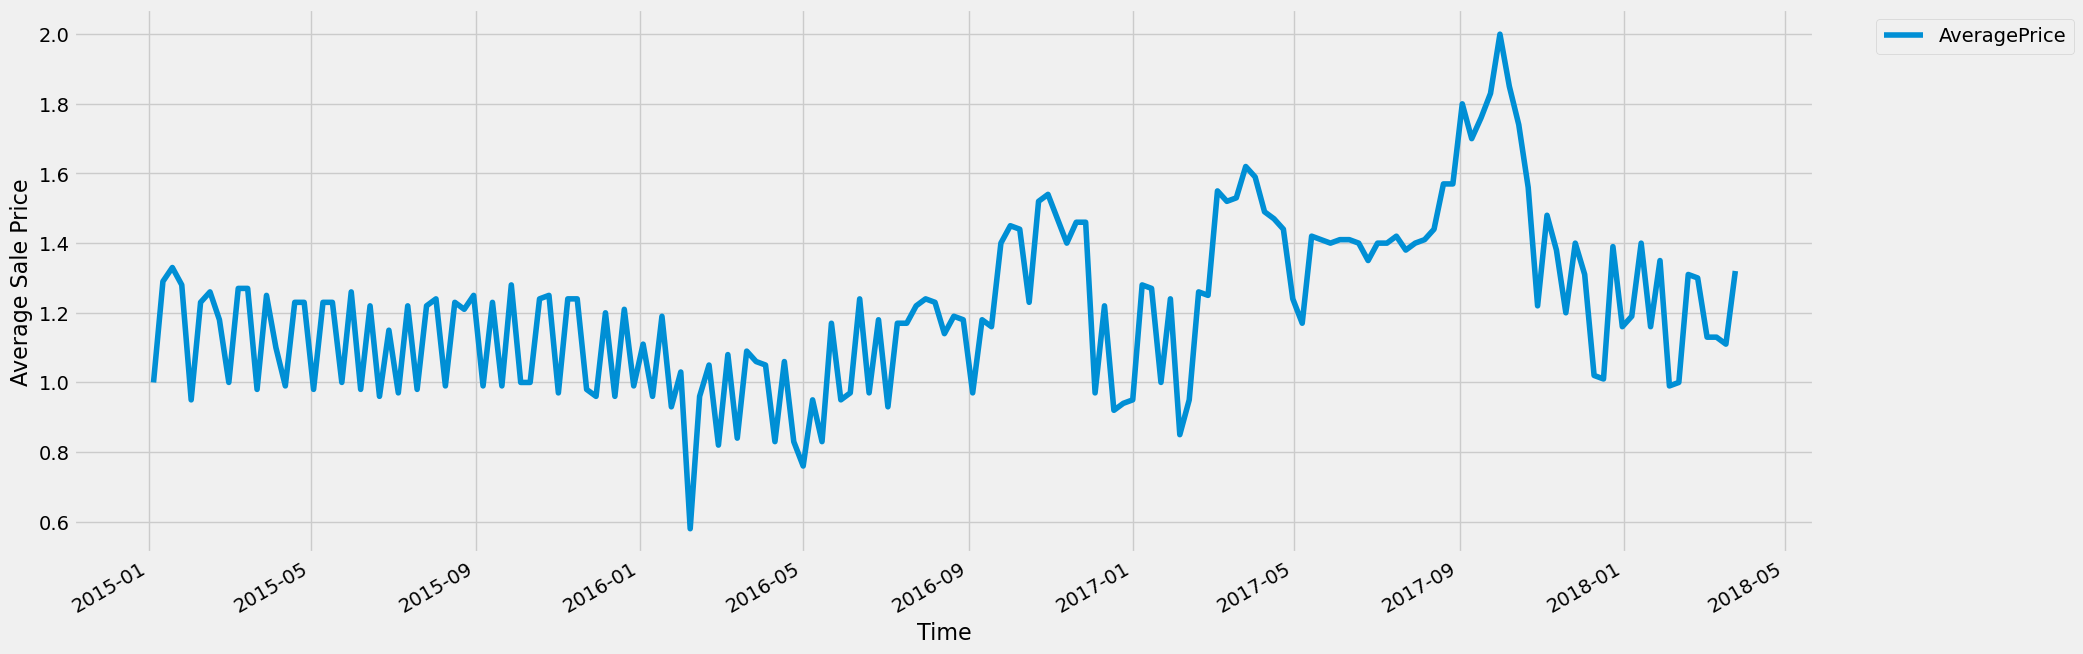

In [9]:
df.plot(figsize = (20,8))

plt.legend(bbox_to_anchor=(1.03,1), loc='upper left')
plt.xlabel("Time", fontsize = 16)
plt.ylabel("Average Sale Price", fontsize = 16)
plt.grid(True)
plt.show()

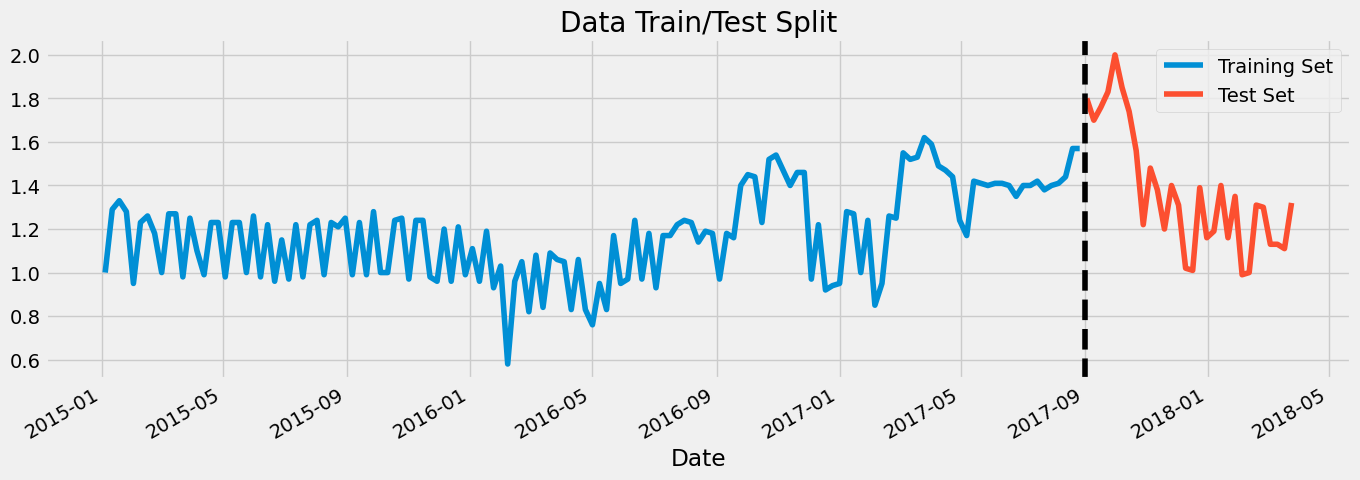

In [10]:
train = df.loc[df.index < '09-01-2017']
test = df.loc[df.index >= '09-01-2017']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('09-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [11]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [12]:
df

,AveragePrice,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,
2015-12-27,0.99,4,12,2015,361,27,52
2015-12-20,1.21,4,12,2015,354,20,51
2015-12-13,0.96,4,12,2015,347,13,50
2015-12-06,1.20,4,12,2015,340,6,49
2015-11-29,0.96,4,11,2015,333,29,48
...,...,...,...,...,...,...,...
2018-02-04,0.99,1,2,2018,35,4,5
2018-01-28,1.35,1,1,2018,28,28,4
2018-01-21,1.16,1,1,2018,21,21,3


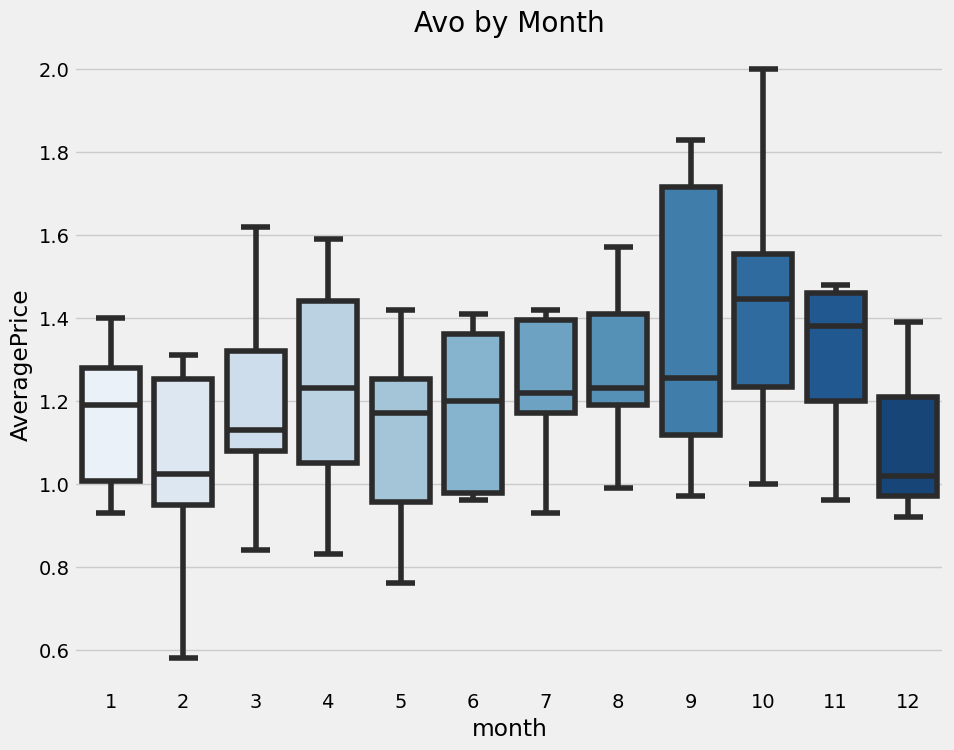

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='AveragePrice', palette='Blues')
ax.set_title('Avo by Month')
plt.show()

In [14]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'year','dayofmonth','weekofyear']
TARGET = 'AveragePrice'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [15]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:0.70398	validation_1-rmse:0.90961
[100]	validation_0-rmse:0.29484	validation_1-rmse:0.43097
[200]	validation_0-rmse:0.15812	validation_1-rmse:0.29955
[300]	validation_0-rmse:0.11737	validation_1-rmse:0.26730
[400]	validation_0-rmse:0.10399	validation_1-rmse:0.26189
[493]	validation_0-rmse:0.09589	validation_1-rmse:0.26161


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

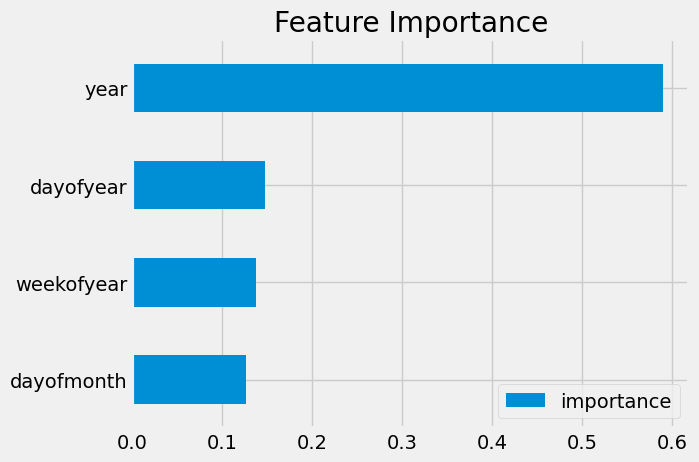

In [16]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

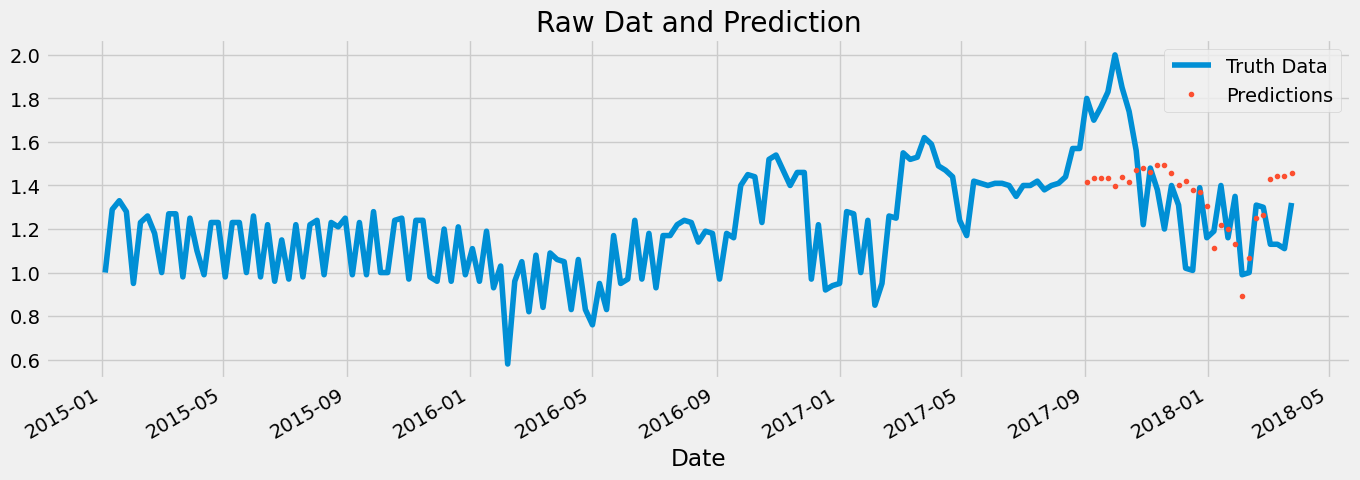

In [17]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['AveragePrice']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()